In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import  pyplot as plt

In [3]:
data = pd.read_csv("HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity.csv")

In [4]:
#lets  get the Data type of the features of the data set
data.dtypes

YEAR                                                                    int64
Borough                                                                object
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

In [5]:
# view a sample of 10 records
data.sample(10)

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
8355,2021,Brooklyn,Canarsie - Flatlands,Female,Latino/Hispanic,1,10.6,1,100,1,10.6
3507,2016,Queens,All,All,Latino/Hispanic,190,36,31,16.3,87,16.5
8811,2021,Queens,Ridgewood - Forest\nHills,Male,Latino/Hispanic,14,45.5,4,28.6,7,22.8
7067,2020,Queens,Long Island City -\nAstoria,Male,Latino/Hispanic,11,54.2,2,18.2,6,29.6
5590,2019,Bronx,Fordham - Bronx\nPark,Male,Other/Unknown,0,0,0,NaN,1,75.1
6856,2020,Manhattan,Greenwich Village -\nSoho,All,Black,5,273.1,1,20,2,109.3
6705,2020,Brooklyn,East New York,Male,Latino/Hispanic,13,51.5,1,7.7,8,31.7
6916,2020,Manhattan,Upper East Side,Female,Black,0,0,0,NaN,0,0
3808,2017,All,All,Male,Other/Unknown,22,40.1,5,22.7,10,18.2
2205,2010,NaN,Ridgewood - Forest Hills,Female,Hispanic,2,5.9,1,50,6,17.7


In [7]:
numeric_columns = ['TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
                           'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
                           'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
                           'TOTAL NUMBER OF AIDS DIAGNOSES']
for items in numeric_columns:
    data[items] = pd.to_numeric(data[items], errors = 'coerce')

In [8]:
data.dtypes

YEAR                                                                     int64
Borough                                                                 object
Neighborhood (U.H.F)                                                    object
SEX                                                                     object
RACE/ETHNICITY                                                          object
TOTAL NUMBER OF HIV DIAGNOSES                                          float64
HIV DIAGNOSES PER 100,000 POPULATION                                   float64
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          float64
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    float64
TOTAL NUMBER OF AIDS DIAGNOSES                                         float64
AIDS DIAGNOSES PER 100,000 POPULATION                                   object
dtype: object

In [9]:
data.columns

Index(['YEAR', 'Borough', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION'],
      dtype='object')

In [11]:
set(data['YEAR'])

{2010, 2011, 2012, 2013, 2016, 2017, 2018, 2019, 2020, 2021}

In [12]:
data['YEAR']

0       2010
1       2011
2       2010
3       2012
4       2013
        ... 
8971    2021
8972    2021
8973    2021
8974    2021
8975    2021
Name: YEAR, Length: 8976, dtype: int64

In [23]:
def getPercentageofNaN():
    try:
        return (data.isna().sum()/data.shape[0] * 100)
    except BaseException as error:
        print(error)

getPercentageofNaN()


YEAR                                                                    0.000000
Borough                                                                32.620321
Neighborhood (U.H.F)                                                    0.000000
SEX                                                                     0.000000
RACE/ETHNICITY                                                          0.000000
TOTAL NUMBER OF HIV DIAGNOSES                                           0.178253
HIV DIAGNOSES PER 100,000 POPULATION                                    0.935829
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0.044563
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    21.111854
TOTAL NUMBER OF AIDS DIAGNOSES                                          0.144831
AIDS DIAGNOSES PER 100,000 POPULATION                                   0.790998
dtype: float64

In [25]:
cat_analysis = data[['Borough', 'Neighborhood (U.H.F)']]

In [26]:
cat_analysis

,Borough,Neighborhood (U.H.F)
0,NaN,Greenpoint
1,NaN,Stapleton - St. George
2,NaN,Southeast Queens
3,NaN,Upper Westside
4,NaN,Willowbrook
...,...,...
8971,Staten\nIsland,Willowbrook
8972,Staten\nIsland,Willowbrook
8973,Staten\nIsland,Willowbrook
8974,Staten\nIsland,Willowbrook


In [27]:
from dataPreprocessing import comparisonBoroughNeigh

In [30]:
type(comparisonBoroughNeigh())

'float' object has no attribute 'lower'


,Neighborhood (U.H.F),Borough
0,greenpoint,NaN
1,stapleton-st.george,NaN
2,southeastqueens,NaN
3,upperwestside,NaN
4,willowbrook,NaN
...,...,...
8971,willowbrook,StatenIsland
8972,willowbrook,StatenIsland
8973,willowbrook,StatenIsland
8974,willowbrook,StatenIsland


NoneType

In [31]:
len(data.columns)

11

In [44]:
cat_analysis

,Borough,Neighborhood (U.H.F)
0,NaN,Greenpoint
1,NaN,Stapleton - St. George
2,NaN,Southeast Queens
3,NaN,Upper Westside
4,NaN,Willowbrook
...,...,...
8971,Staten\nIsland,Willowbrook
8972,Staten\nIsland,Willowbrook
8973,Staten\nIsland,Willowbrook
8974,Staten\nIsland,Willowbrook


<AxesSubplot:xlabel='Neighborhood (U.H.F)', ylabel='Borough'>

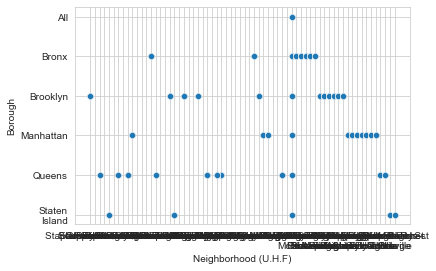

In [45]:
sb.scatterplot(data=cat_analysis.loc[cat_analysis['Neighborhood (U.H.F)'] == 'Fordham - Bronx Park' ], x=cat_analysis['Neighborhood (U.H.F)'], y= cat_analysis['Borough'])

In [47]:
data.loc[data['Neighborhood (U.H.F)'] ==  'Union Square - Lower Eastside']

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
24,2010,NaN,Union Square - Lower Eastside,Female,Multiracial,0.0,0.0,0.0,0.0,0.0,0
26,2012,NaN,Union Square - Lower Eastside,Female,White,1.0,2.2,0.0,0.0,0.0,0
29,2010,NaN,Union Square - Lower Eastside,Female,All,7.0,6.7,1.0,14.3,11.0,10.5
118,2011,NaN,Union Square - Lower Eastside,All,All,91.0,45.3,19.0,20.9,56.0,27.9
128,2010,NaN,Union Square - Lower Eastside,Male,White,28.0,66.2,3.0,10.7,7.0,16.5
...,...,...,...,...,...,...,...,...,...,...,...
2572,2012,NaN,Union Square - Lower Eastside,Male,White,28.0,65.6,3.0,10.7,10.0,23.4
2662,2012,NaN,Union Square - Lower Eastside,Female,Native American,0.0,0.0,0.0,0.0,0.0,0
2816,2012,NaN,Union Square - Lower Eastside,Male,Unknown,0.0,0.0,0.0,0.0,0.0,0
2834,2013,NaN,Union Square - Lower Eastside,Female,Unknown,0.0,0.0,0.0,0.0,0.0,0


In [42]:
data[['Borough','Neighborhood (U.H.F)']][list(set(data['Neighborhood (U.H.F)']))]

KeyError: "None of [Index(['East New York', 'Pelham - Throgs\\nNeck',\n       'Bedford Stuyvesant - Crown Heights', 'Coney Island - Sheepshead Bay',\n       'Greenpoint', 'Downtown - Heights - Park Slope',\n       'Gramercy Park - Murray Hill', 'Upper West Side',\n       'East Flatbush - Flatbush', 'Upper Eastside', 'Stapleton - St.\\nGeorge',\n       'Union Square - Lower Eastside', 'East Harlem',\n       'Bensonhurst - Bay\\nRidge', 'Washington Heights -\\nInwood',\n       'Hunts Point - Mott\\nHaven', 'Southeast Queens',\n       'South Beach -\\nTottenville', 'Flushing - Clearview',\n       'Union Square -\\nLower East Side', 'Kingsbridge - Riverdale',\n       'High Bridge - Morrisania', 'Fordham - Bronx\\nPark',\n       'Williamsburg -\\nBushwick', 'Chelsea - Clinton', 'Pelham - Throgs Neck',\n       'Sunset Park', 'South Beach - Tottenville', 'Upper East Side',\n       'Fresh Meadows', 'Coney Island -\\nSheepshead Bay',\n       'High Bridge -\\nMorrisania', 'Ridgewood - Forest\\nHills',\n       'Greenwich Village -\\nSoho', 'Jamaica', 'Greenwich Village - SoHo',\n       'Upper Westside', 'Bedford Stuyvesant -\\nCrown Heights',\n       'Kingsbridge -\\nRiverdale', 'Downtown - Heights -\\nPark Slope',\n       'Borough Park', 'Long Island City -\\nAstoria',\n       'Washington Heights - Inwood', 'Canarsie - Flatlands',\n       'Lower Manhattan', 'Williamsburg - Bushwick', 'Southwest Queens',\n       'Central Harlem - Morningside Heights', 'Bayside - Little Neck',\n       'Bensonhurst - Bay Ridge', 'Hunts Point - Mott Haven', 'All',\n       'Gramercy Park -\\nMurray Hill', 'Fordham - Bronx Park',\n       'Northeast Bronx', 'Stapleton - St. George', 'West Queens',\n       'Long Island City - Astoria', 'Willowbrook', 'Port Richmond',\n       'Central Harlem -\\nMorningside Heights', 'Ridgewood - Forest Hills',\n       'Rockaway', 'Unknown', 'Crotona - Tremont',\n       'East Flatbush -\\nFlatbush'],\n      dtype='object')] are in the [columns]"

In [49]:
data.iloc[4487]

YEAR                                                                                        2017
Borough                                                                                   Queens
Neighborhood (U.H.F)                                                   Ridgewood - Forest\nHills
SEX                                                                                       Female
RACE/ETHNICITY                                                                             White
TOTAL NUMBER OF HIV DIAGNOSES                                                                0.0
HIV DIAGNOSES PER 100,000 POPULATION                                                         0.0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                                                0.0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES                          NaN
TOTAL NUMBER OF AIDS DIAGNOSES                                                               0.0
AIDS DIAGNOSES PER 100,000 POP

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'TOTAL NUMBER OF HIV DIAGNOSES'}>],
       [<AxesSubplot:title={'center':'HIV DIAGNOSES PER 100,000 POPULATION'}>,
        <AxesSubplot:title={'center':'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'}>],
       [<AxesSubplot:title={'center':'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'}>,
        <AxesSubplot:title={'center':'TOTAL NUMBER OF AIDS DIAGNOSES'}>]],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

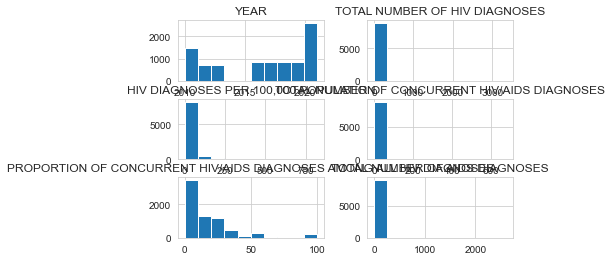

In [50]:
plt.figure(figsize=(20,20))
data.hist()

In [51]:
data.isna().sum()

YEAR                                                                      0
Borough                                                                2928
Neighborhood (U.H.F)                                                      0
SEX                                                                       0
RACE/ETHNICITY                                                            0
TOTAL NUMBER OF HIV DIAGNOSES                                            16
HIV DIAGNOSES PER 100,000 POPULATION                                     84
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             4
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1895
TOTAL NUMBER OF AIDS DIAGNOSES                                           13
AIDS DIAGNOSES PER 100,000 POPULATION                                    71
dtype: int64

TypeError: '<=' not supported between instances of 'float' and 'str'

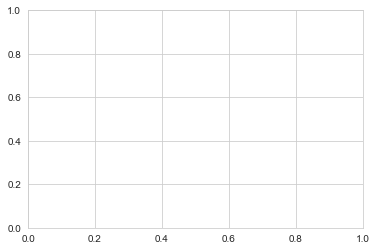

In [52]:
plt.hist(data['Borough'], bins=10)